In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import seaborn as sns

In [2]:
data=pd.read_csv('PlayTennis.csv')

In [3]:
data.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [4]:
data.dtypes


outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object

In [5]:
data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [6]:
data.outlook.value_counts()

sunny       5
rainy       5
overcast    4
Name: outlook, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
l=LabelEncoder()

In [9]:
for i in data.columns:
    if data[i].dtypes=='object' or data[i].dtypes=='bool':
        data[i]=pd.Categorical(data[i])

for i in data.columns: 
        data[i]=l.fit_transform(data[i])

In [10]:
data.dtypes

outlook     int32
temp        int32
humidity    int32
windy       int32
play        int32
dtype: object

In [11]:
data.head()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [12]:
x=data.drop(['play'],axis=1)
y=data['play']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [14]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=1)

In [15]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [16]:
print(dtree.score(x_train,y_train))#data is over fitted so we use max_depth =5 means prunning technique
print(dtree.score(x_test,y_test))

1.0
0.4


In [17]:
dtree1=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=1)

In [18]:
dtree1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [19]:
print(dtree1.score(x_train,y_train))#data is over fitted so we use max_depth =5 means prunning technique
print(dtree1.score(x_test,y_test))

1.0
0.4


In [20]:
#but data remain overfitted

In [21]:
y_predict=dtree.predict(x_test)

<AxesSubplot:>

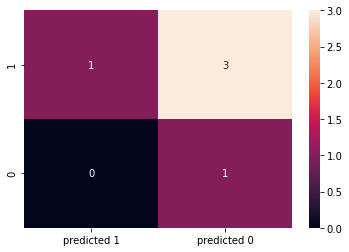

In [26]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test,y_predict,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in['1','0']],columns=[i for i in['predicted 1','predicted 0']] )
df_cm
sns.heatmap(df_cm,annot=True)

In [27]:
from sklearn.metrics import classification_report

In [28]:
m=classification_report(y_test,y_predict)

In [29]:
print(m)

              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       1.00      0.25      0.40         4

    accuracy                           0.40         5
   macro avg       0.62      0.62      0.40         5
weighted avg       0.85      0.40      0.40         5

